# Задача выделения сообществ и метрики оценки качества

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.remove_edges_from.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
* Дополнительные источники:
   * https://arxiv.org/pdf/0906.0612.pdf

## Вопросы для совместного обсуждения

1\. Обсудите основные метрики для оценки качества выделенных сообществ и способы их вычисления.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите сеть `Southern women` с сайта http://konect.cc/, удалите из него петли и создайте не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Для создания разбиений не используйте специализированные алгоритмы. Визуализируйте графы, раскрасив узлы в цвет соответствующего им сообщества.

- [x] Проверено на семинаре

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import tarfile
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
archive_path = '/content/drive/MyDrive/out.opsahl-southernwomen'
data = pd.read_csv(archive_path)
data

,% bip unweighted
0,% 89 18 14
1,1 1
2,1 2
3,1 3
4,1 4
...,...
85,16 8
86,17 8
87,17 14
88,18 8


In [ ]:
G = nx.read_edgelist(archive_path,comments='%')

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
#random
num_partitions = 5
partitions = []

for _ in range(num_partitions):
    partition = [[], []]

    for node in G.nodes():
        community = random.choice([0, 1])
        partition[community].append(node)
    partitions.append(partition)
print(partitions)

[[['2', '4', '5', '6', '8', '9', '10', '11', '13', '17', '18'], ['1', '3', '7', '12', '14', '15', '16']], [['2', '3', '4', '5', '10', '13', '14', '16'], ['1', '6', '7', '8', '9', '11', '12', '15', '17', '18']], [['2', '3', '8', '9', '10', '11', '14', '15', '16'], ['1', '4', '5', '6', '7', '12', '13', '17', '18']], [['4', '5', '10', '13', '15', '16', '18'], ['1', '2', '3', '6', '7', '8', '9', '11', '12', '14', '17']], [['2', '3', '4', '8', '11', '13', '14'], ['1', '5', '6', '7', '9', '10', '12', '15', '16', '17', '18']]]


In [ ]:
#вручную
partitions = [[list(range(1,10))+list(range(16,19)), list(range(10,16))],
 [list(range(7,19)), list(range(1,7))],
 [list(range(1,16)), list(range(16,19))],
 [list(range(1,7))+list(range(10,19)), list(range(7,10))],
 [list(range(9,19)), list(range(1,9))]]

In [ ]:
str_list = []

# Перевод каждого значения списка в тип str
for sublist in partitions:
    str_sublist = [[str(val) for val in inner_list] for inner_list in sublist]
    str_list.append(str_sublist)

print(str_list)

[[['1', '2', '3', '4', '5', '6', '7', '8', '9', '16', '17', '18'], ['10', '11', '12', '13', '14', '15']], [['7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'], ['1', '2', '3', '4', '5', '6']], [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'], ['16', '17', '18']], [['1', '2', '3', '4', '5', '6', '10', '11', '12', '13', '14', '15', '16', '17', '18'], ['7', '8', '9']], [['9', '10', '11', '12', '13', '14', '15', '16', '17', '18'], ['1', '2', '3', '4', '5', '6', '7', '8']]]


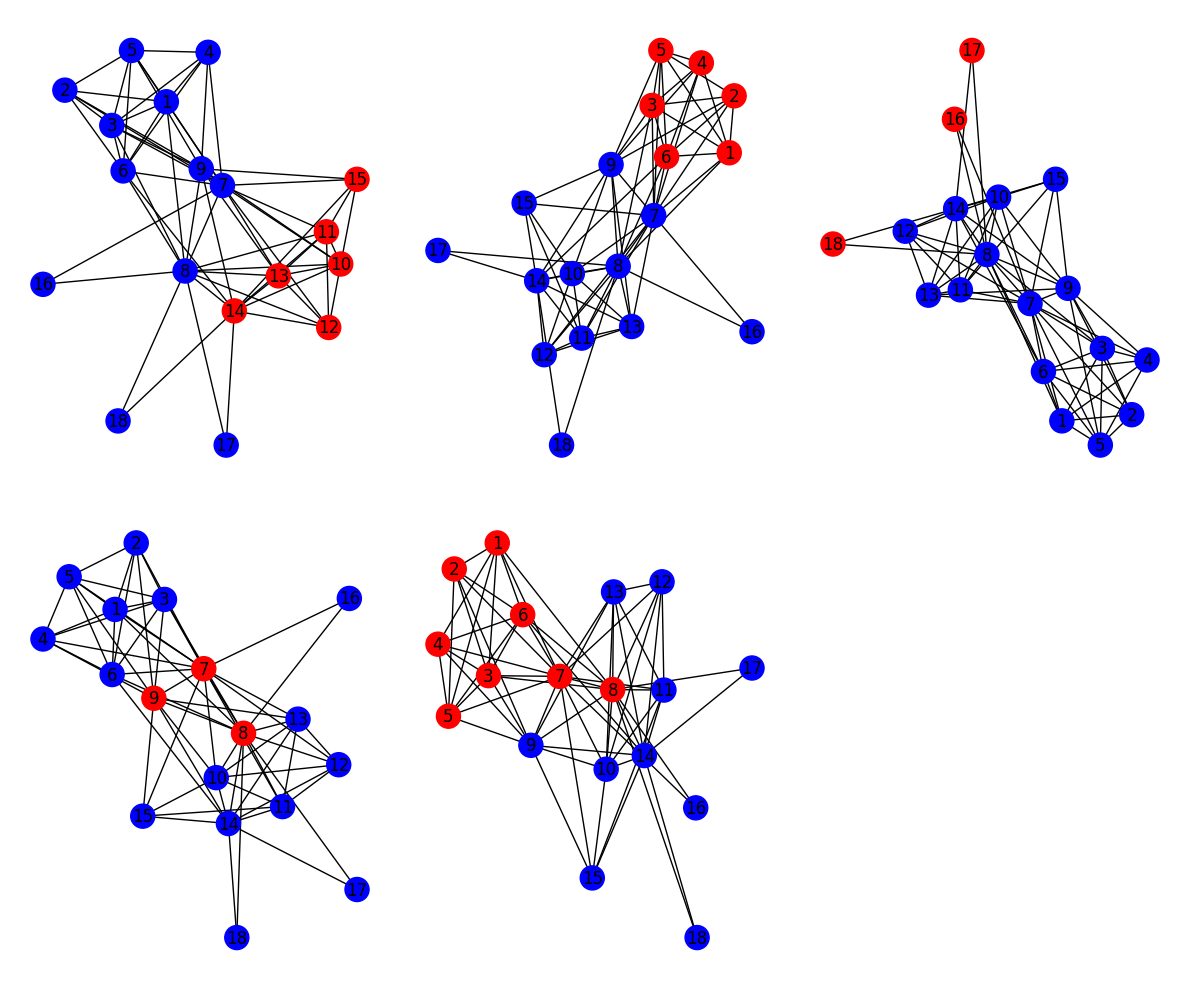

In [ ]:
plt.figure(figsize=(12, 10))

for i, partition in enumerate(str_list):
    plt.subplot(2, 3, i+1)
    colors = ['blue' if node in partition[0] else 'red' for node in G.nodes()]
    nx.draw(G, with_labels=True, node_color=colors)

plt.tight_layout()
plt.show()

<p class="task" id="2"></p>

2\. Для разбиений из предыдущей задачи посчитайте три величины: плотность первого сообщества, плотность второго сообщества и среднюю плотность сообществ (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x, y, z
```
где `x` - плотность первого сообщества, `y` - плотность второго сообщества, `z` - средняя плотность сообществ.

Посчитайте и выведите плотность сети без разбиения на сообществ:

```
Плотность сети: x
```

- [ ] Проверено на семинаре

In [ ]:
for i, partition in enumerate(str_list):
    community1 = partition[0]
    community2 = partition[1]

    subgraph_community1 = G.subgraph(community1)
    subgraph_community2 = G.subgraph(community2)

    density_community1 = nx.density(subgraph_community1)
    density_community2 = nx.density(subgraph_community2)

    average_density = (density_community1 + density_community2) / 2
    print(f'Разбиение {i+1}: {density_community1:.2f}, {density_community2:.2f}, {average_density:.2f}')

network_density = nx.density(G)
print(f'Плотность сети: {network_density:.2f}')

Разбиение 1: 0.52, 0.87, 0.69
Разбиение 2: 0.55, 0.93, 0.74
Разбиение 3: 0.55, 0.00, 0.28
Разбиение 4: 0.29, 1.00, 0.64
Разбиение 5: 0.42, 0.86, 0.64
Плотность сети: 0.42


<p class="task" id="3"></p>

3\. Для разбиений из первой задачи посчитайте модулярность (округлите значения до сотых). Выведите результаты в следующем виде:

```
Разбиение i: x
```
где `x` - мера модулярности для разбиения `i`.

Посчитайте и выведите модулярность в случае разделения узлов на одно сообщество:

```
Модулярность разбиения с одним сообществом: x
```

- [ ] Проверено на семинаре

In [ ]:
for i, partition in enumerate(str_list):
    modularity = nx.community.modularity(G,partition)
    print(f'Разбиение {i+1}: {modularity:.2f}')

single_community_partition = [list(G.nodes())]
single_community_modularity = nx.community.modularity(G, single_community_partition)
print(f'Модулярность разбиения с одним сообществом: {single_community_modularity:.2f}')

Разбиение 1: 0.18
Разбиение 2: 0.22
Разбиение 3: -0.00
Разбиение 4: -0.07
Разбиение 5: 0.17
Модулярность разбиения с одним сообществом: 0.00


<p class="task" id="4"></p>

4\. Для разбиений из первой задачи посчитайте метрики покрытия (coverage) и эффективности (performance). (округлите значения до сотых). Выведите результаты в следующей виде:

```
Разбиение i: x, y
```
где `x` - значение метрики покрытия для разбиения `i`, `y` - значение метрики эффективности для разбиения `i`.

- [ ] Проверено на семинаре

In [ ]:
for i, partition in enumerate(str_list):
    coverage,performance = nx.community.partition_quality(G,partition)
    print(f'Разбиение {i+1}: {coverage:.2f}, {performance:.2f}')

Разбиение 1: 0.73, 0.67
Разбиение 2: 0.78, 0.71
Разбиение 3: 0.91, 0.63
Разбиение 4: 0.52, 0.31
Разбиение 5: 0.67, 0.67


<p class="task" id="5"></p>

5\. Вычислите значение центральности по посредничеству для всех узлов сети. Выделите множество узлов $C_0$, центральность по посредничеству для которых строго больше, чем среднее значение центральности для всех узлов графа. Удалите узлы множества $C_0$ из графа и выделите компоненты связности $C_1, ...C_k$. Выведите полученные компоненты связности на экран.

Восстановите исходный граф со всеми узлами. Трактуя множества $C_0, ... C_k$ как сообщества, посчитайте значения модулярности, покрытия и эффективности для такого разбиения. Выведите полученные значения на экран.

Визуализируйте граф, раскрасив узлы в цвет сообществующего им сообщества.

- [ ] Проверено на семинаре